In [213]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [214]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
import MicroTools as micro
from MicroTools import plot_tools as pt
import MiniTools as mini
import param_scan

from importlib.resources import open_text


In [215]:
dic_osc_app = param_scan.load_scan_data('fit_data/MH_apponly.pkl')
dic_osc_full = param_scan.load_scan_data('fit_data/MH_numu_MC_keep_numu_norm.pkl')
dic_dec_full = param_scan.load_scan_data('fit_data/MH_decay_test_30.pkl')

bf_osc_app = param_scan.get_best_fit_point(dic_osc_app)
bf_osc_full = param_scan.get_best_fit_point(dic_osc_full)
bf_dec_full = param_scan.get_best_fit_point(dic_dec_full)

In [216]:
params_no_osc = {'g': 1e-10, 'Ue4Sq': 1e-10, 'Um4Sq': 1e-10, 'm4': 1}
rates_no_osc = param_scan.get_nue_rates(params_no_osc, oscillations=True, use_numu_MC=True, include_antineutrinos=True, decay=False, decouple_decay=False, disappearance=True, energy_degradation=True, n_replications=1, undo_numu_normalization=False)


params_BEST_osc = {'g': 1e-5, 'Ue4Sq': 0.1, 'Um4Sq': 1e-2, 'm4': 1}
params_BEST_dec = {'g': 1, 'Ue4Sq': 0.1, 'Um4Sq': 3e-3, 'm4': 1e3}
rates_dic_osc_BEST = param_scan.get_nue_rates(params_BEST_osc, oscillations=True, use_numu_MC=True, include_antineutrinos=True, decay=False, decouple_decay=False, disappearance=True, energy_degradation=True, n_replications=1, undo_numu_normalization=False)
rates_dic_decay_BEST = param_scan.get_nue_rates(params_BEST_dec, oscillations=True, use_numu_MC=True, include_antineutrinos=True, decay=True, decouple_decay=False, disappearance=True, energy_degradation=True, n_replications=10, undo_numu_normalization=False)

params_solar_osc = {'g': 1e-3, 'Ue4Sq': 0.05, 'Um4Sq': 2e-2, 'm4': 1}
params_solar_dec = {'g': 1, 'Ue4Sq': 0.05, 'Um4Sq': 3e-3, 'm4': 1e3}
rates_dic_osc_solar = param_scan.get_nue_rates(params_solar_osc, oscillations=True, use_numu_MC=True, include_antineutrinos=True, decay=False, decouple_decay=False, disappearance=True, energy_degradation=True, n_replications=1, undo_numu_normalization=False)
rates_dic_decay_solar = param_scan.get_nue_rates(params_solar_dec, oscillations=True, use_numu_MC=True, include_antineutrinos=True, decay=True, decouple_decay=False, disappearance=True, energy_degradation=True, n_replications=10, undo_numu_normalization=False)

rates_dic_bf_osc_full = param_scan.get_nue_rates(bf_osc_full, oscillations=True, use_numu_MC=True, include_antineutrinos=True, decay=False, decouple_decay=False, disappearance=True, energy_degradation=True, n_replications=1, undo_numu_normalization=False)
rates_dic_bf_dec_full = param_scan.get_nue_rates(bf_dec_full, oscillations=True, use_numu_MC=True, include_antineutrinos=True, decay=True, decouple_decay=False, disappearance=True, energy_degradation=True, n_replications=10, undo_numu_normalization=False)

[1.22938999e-10 8.46849655e-11 1.48368567e-10 ... 7.03604668e-11
 2.91570747e-11 1.31230364e-11] [0. 0. 0. ... 0. 0. 0.]
[3.13701347e-10 3.51427386e-10 1.75709612e-10 ... 2.27261188e-10
 6.65333659e-11 6.67576262e-11] [0. 0. 0. ... 0. 0. 0.]
[0.1106451  0.07621647 0.13353171 ... 0.06332442 0.02624137 0.01181073] [0. 0. 0. ... 0. 0. 0.]
[0.28233121 0.31628465 0.15813865 ... 0.20453507 0.05988003 0.06008186] [0. 0. 0. ... 0. 0. 0.]
[0.09 0.09 0.09 ... 0.09 0.09 0.09] [0.00435437 0.01306311 0.02177184 ... 0.06531553 0.07402427 0.08273301]
[0.09 0.09 0.09 ... 0.09 0.09 0.09] [0.00435437 0.01306311 0.02177184 ... 0.06531553 0.07402427 0.08273301]
[0.05839602 0.04022536 0.07047507 ... 0.03342122 0.01384961 0.00623344] [0. 0. 0. ... 0. 0. 0.]
[0.14900814 0.16692801 0.08346207 ... 0.10794906 0.03160335 0.03170987] [0. 0. 0. ... 0. 0. 0.]
[0.0475 0.0475 0.0475 ... 0.0475 0.0475 0.0475] [0.00223349 0.00670047 0.01116745 ... 0.03350236 0.03796934 0.04243632]
[0.0475 0.0475 0.0475 ... 0.0475 0.047

In [217]:
from MicroTools.sterile_tools import Sterile

dic = {'g': 100, 'Ue4Sq': 0.5, 'Um4Sq': 0.00001, 'm4': 1000.0}
sterile = Sterile(
dic,
oscillations=True,
decay=True,
decouple_decay=False,
CP=+1,
)

# ells = np.linspace(0.8*micro.L_micro, 1.2*micro.L_micro)
# Eparent = 1.0
# Edaughter = np.linspace(0, Eparent, 10)

# plt.plot(Edaughter, sterile.Pee(Eparent, Edaughter, micro.L_micro))

In [218]:
params_hugeUe4_osc = {'g': 1e-10, 'Ue4Sq': 0.5, 'Um4Sq': 1e-5, 'm4': 1e3}
params_hugeUe4_dec = {'g': 2.5, 'Ue4Sq': 0.5, 'Um4Sq': 1e-5, 'm4': 1e3}
params_medUe4_dec = {'g': 2.5, 'Ue4Sq': 0.1, 'Um4Sq': 1e-5, 'm4': 1e3}
rates_dic_osc_hugeUe4 = param_scan.get_nue_rates(params_hugeUe4_osc, oscillations=True, use_numu_MC=True, include_antineutrinos=True, decay=False, decouple_decay=False, disappearance=True, energy_degradation=False, n_replications=1, undo_numu_normalization=False)
rates_dic_decay_hugeUe4 = param_scan.get_nue_rates(params_hugeUe4_dec, oscillations=True, use_numu_MC=True, include_antineutrinos=True, decay=True, decouple_decay=False, disappearance=True, energy_degradation=True, n_replications=10, undo_numu_normalization=False)
rates_dic_decay_medUe4 = param_scan.get_nue_rates(params_medUe4_dec, oscillations=True, use_numu_MC=True, include_antineutrinos=True, decay=True, decouple_decay=False, disappearance=True, energy_degradation=True, n_replications=10, undo_numu_normalization=False)


[0.17174866 0.91610151 0.8914137  ... 0.98841295 0.44381524 0.02269114] [0. 0. 0. ... 0. 0. 0.]
[0.8310953  0.4868221  0.99972043 ... 0.99984098 0.14374967 0.72813998] [0. 0. 0. ... 0. 0. 0.]
[0.25 0.25 0.25 ... 0.25 0.25 0.25] [0.0124995 0.0374985 0.0624975 ... 0.1874925 0.2124915 0.2374905]
[0.25 0.25 0.25 ... 0.25 0.25 0.25] [0.0124995 0.0374985 0.0624975 ... 0.1874925 0.2124915 0.2374905]
[0.09 0.09 0.09 ... 0.09 0.09 0.09] [0.0044995 0.0134985 0.0224975 ... 0.0674925 0.0764915 0.0854905]
[0.09 0.09 0.09 ... 0.09 0.09 0.09] [0.0044995 0.0134985 0.0224975 ... 0.0674925 0.0764915 0.0854905]


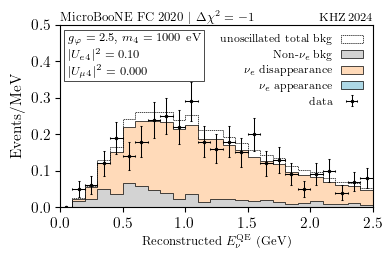

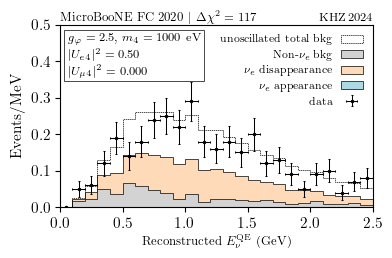

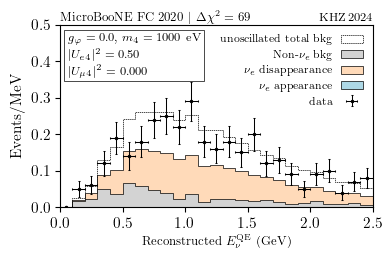

In [212]:

make_micro_rate_plot(rates_dic_decay_medUe4, params_medUe4_dec, '3+1_dec_medUe4_nodeg')
make_micro_rate_plot(rates_dic_decay_hugeUe4, params_hugeUe4_dec, '3+1_dec_hugeUe4')
make_micro_rate_plot(rates_dic_osc_hugeUe4, params_hugeUe4_osc, '3+1_osc_hugeUe4')

## MiniBooNE nu_e sample

In [229]:
# settings for Mini Figs
TOTAL_RATE = False
INCLUDE_MB_LAST_BIN = False
STACKED = False
PLOT_FAMILY=False
PATH_PLOTS = 'plots/event_rates/'

PAPER_TAG = r'HKZ\,2024'

In [230]:
Weight_nue_flux = mini.apps.reweight_MC_to_nue_flux(
            param_scan.Etrue_nue, param_scan.Weight_nue, mode="fhc"
        )

MC_nue_bkg_intrinsic = np.dot(
                param_scan.fast_histogram(
                    param_scan.Etrue_nue, bins=param_scan.e_prod_e_int_bins, weights=Weight_nue_flux
                )[0],
                mini.apps.migration_matrix_official_bins_nue_11bins,
            )

In [221]:
len(rates_dic_osc_solar['MC_nue_app'])*2 + len(rates_dic_osc_solar['MC_numu_bkg_total_w_dis'])*2

38

In [222]:
import scipy
from scipy.stats import norm
def get_pval(rates_dic, ndof=8.7):
    MB_chi2 = mini.fit.chi2_MiniBooNE_combined(
                MC_nue_app=rates_dic["MC_nue_app"],
                MC_nuebar_app=rates_dic["MC_nuebar_app"],
                MC_nue_dis=rates_dic["MC_nue_bkg_total_w_dis"],
                MC_numu_dis=rates_dic["MC_numu_bkg_total_w_dis"],
                MC_nuebar_dis=rates_dic["MC_nuebar_bkg_total_w_dis"],
                MC_numubar_dis=rates_dic["MC_numubar_bkg_total_w_dis"],
                year="2020",
            )
    return scipy.stats.chi2.sf(MB_chi2, ndof)


def get_pval_nu(rates_dic, ndof=8.7):
    MB_chi2 = mini.fit.chi2_MiniBooNE_combined(
                MC_nue_app=rates_dic["MC_nue_app"],
                MC_nue_dis=rates_dic["MC_nue_bkg_total_w_dis"],
                MC_numu_dis=rates_dic["MC_numu_bkg_total_w_dis"],
                year="2020",
            )
    return scipy.stats.chi2.sf(MB_chi2, ndof)


# import the necessary module
# define the chi-square probability
pval, pval_nu = get_pval(rates_dic_decay_solar, ndof=38 - 2), get_pval(rates_dic_decay_solar, ndof=38/2 - 1)

# calculate the number of standard deviations # NOTE: lazy... I can't remember how to relate the two....
# std_devs, std_devs_nu = np.sqrt(scipy.stats.chi2.ppf(1-pval, 38-2)), np.sqrt(scipy.stats.chi2.ppf(1-pval_nu, 38/2-1))

print(pval, pval_nu)

0.33909874991835215 0.0029086280454269416


In [234]:
def make_rate_plot(rates, params, name='3+1_osc'):
    fig, ax1 = pt.std_fig(figsize=(3.3*1.2,2.1*1.2))
    bins = param_scan.MB_Ereco_official_bins
    bin_w = np.diff(bins)
    bin_c = bins[:-1] + bin_w/2

    ######################################
    # MiniBooNE 
    if TOTAL_RATE:
        units= 1
        ax1.set_ylabel(r"Events")
    else:
        units = 1/micro.bin_width
        ax1.set_ylabel(r"Events/MeV")

    nue_data = np.genfromtxt(
        open_text(
            f"MiniTools.include.MB_data_release_2020.combined",
            f"miniboone_nuedata_lowe.txt",
        )
    )
    nue_tot_bkg = np.genfromtxt(
                open_text(
                    f"MiniTools.include.MB_data_release_2020.combined",
                    f"miniboone_nuebgr_lowe.txt",
                )
            )
    nue_bkg_midID = nue_tot_bkg - MC_nue_bkg_intrinsic

    # plot data
    pt.data_plot(ax1, 
            X=bin_c,
            Y=nue_data*units, 
            xerr=bin_w/2, 
            yerr=np.sqrt(nue_data)*units,
            zorder=3)


    ax1.hist(bins[:-1],
            bins=bins,
            weights=(nue_tot_bkg)*units,
            edgecolor='black',
            lw=0.5,
            ls=(1,(2,1)),
            label=r'unoscillated total bkg',
            histtype='step',
            zorder=1.6)
    ax1.hist(bins[:-1],
            bins=bins,
            weights=(nue_bkg_midID)*units,
            edgecolor='black',
            facecolor='lightgrey',
            lw=0.5,
            label=r'misID bkg',
            histtype='stepfilled',
            zorder=2)
    ax1.hist(bins[:-1],
            bins=bins,
            # weights=(nue_tot_bkg)*units,
            weights=rates['MC_nue_bkg_total_w_dis']*units,
            edgecolor='black',
            facecolor='peachpuff',
            lw=0.5,
            label=r'$\nu_e$ disappearance',
            histtype='stepfilled',
            zorder=1.6)
    ax1.hist(bins[:-1],
            bins=bins,
            weights=(rates['MC_nue_app'] + rates['MC_nue_bkg_total_w_dis'])*units,
            # weights=(rates_dic_osc['MC_nue_app'] + nue_tot_bkg)*units,
            edgecolor='black',
            facecolor='lightblue',
            lw=0.5,
            linestyle=(1,(3,0)),
            label=r'$\nu_\mu \to \nu_e$ appearance',
            histtype='stepfilled',
            zorder=1.5)



    ax1.legend(fontsize=8, markerfirst=False, ncol=1)
    pval = r'$p_{\rm val}$'
    pval_str = fr'{pval} $\,= {pt.sci_notation(get_pval(rates, 38-5)*100, sig_digits=2, optional_sci=2, notex=True)}\%$'
    # ax1.annotate(text=r'MiniBooNE FHC 2020 -- '+ pval_str, xy=(0.0,1.025), xycoords='axes fraction', fontsize=9)
    ax1.annotate(text=r'MiniBooNE FHC 2020', xy=(0.0,1.025), xycoords='axes fraction', fontsize=9)
    ax1.annotate(text=rf'\noindent $g_\varphi = {params["g"]:.1f}$\\$m_4 = {params["m4"]:.1f}$ eV\\$|U_{{e4}}|^2 = {params["Ue4Sq"]:.2f}$\\$|U_{{\mu 4}}|^2 = {params["Um4Sq"]:.3f}$', 
                 xy=(0.72,0.45), 
                 xycoords='axes fraction', 
                 fontsize=8.5,
                 bbox=dict(facecolor='none', edgecolor='black', linewidth=0.5, boxstyle='square,pad=0.3'))
    ax1.set_xlabel(r"Reconstructed $E_\nu^{\rm QE}$ (GeV)", fontsize=9, labelpad=2.5)
    if INCLUDE_MB_LAST_BIN:
        ax1.set_xticks([0.2,0.5,1,1.5,2,2.5,3])
        ax1.set_xlim(0.2,3)
    else:
        ax1.set_xticks([0.2,0.4,0.6,0.8,1,1.2,1.4])
        ax1.set_xlim(0.2,1.5)
    ax1.set_ylim(0,8)
    # ax1.xaxis.set_major_locator(pt.MultipleLocator(0.5))
    # ax1.xaxis.set_minor_locator(pt.MultipleLocator(0.1))

    ax1.annotate(text=PAPER_TAG, xy=(1,1.025), xycoords='axes fraction', fontsize=8.5, ha='right')
    # ax1.annotate(text=fr'{pval} $\,= {get_pval(rates, 38-5)*100:.1f}\%$', xy=(0.15,0.9), xycoords='axes fraction', fontsize=8.5)
    # fig.savefig(f"{PATH_PLOTS}/Mini_{name}.png", dpi=400)
    fig.savefig(f"{PATH_PLOTS}/Mini_{name}.pdf", dpi=400, bbox_inches='tight')

/var/folders/dl/ccbsfs591r1fhgcws28m8xy40000gn/T/ipykernel_3604/48263082.py:17: DeprecationWarning: open_text is deprecated. Use files() instead. Refer to https://importlib-resources.readthedocs.io/en/latest/using.html#migrating-from-legacy for migration advice.
  open_text(
/var/folders/dl/ccbsfs591r1fhgcws28m8xy40000gn/T/ipykernel_3604/48263082.py:23: DeprecationWarning: open_text is deprecated. Use files() instead. Refer to https://importlib-resources.readthedocs.io/en/latest/using.html#migrating-from-legacy for migration advice.
  open_text(


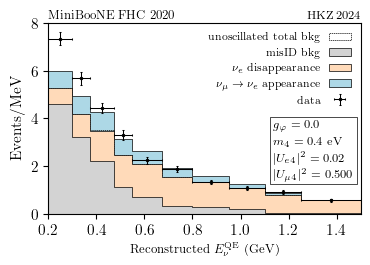

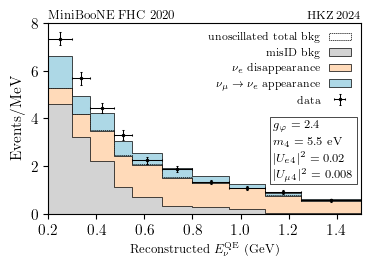

In [235]:
make_rate_plot(rates_dic_bf_osc_full, bf_osc_full, '3+1_osc_bf')
make_rate_plot(rates_dic_bf_dec_full, bf_dec_full, '3+1_dec_bf')

# make_numu_rate_plot(rates_dic_bf_osc_full, bf_osc_full, '3+1_osc_bf')
# make_numu_rate_plot(rates_dic_bf_dec_full, bf_dec_full, '3+1_dec_bf')

# make_micro_rate_plot(rates_dic_bf_osc_full, bf_osc_full, '3+1_osc_bf')
# make_micro_rate_plot(rates_dic_bf_dec_full, bf_dec_full, '3+1_dec_bf')

# make_micro_rate_plot(rates_dic_bf_osc_full, bf_osc_full, '3+1_osc_bf', PC=True)
# make_micro_rate_plot(rates_dic_bf_dec_full, bf_dec_full, '3+1_dec_bf', PC=True)

/var/folders/dl/ccbsfs591r1fhgcws28m8xy40000gn/T/ipykernel_3604/973395793.py:17: DeprecationWarning: open_text is deprecated. Use files() instead. Refer to https://importlib-resources.readthedocs.io/en/latest/using.html#migrating-from-legacy for migration advice.
  open_text(
/var/folders/dl/ccbsfs591r1fhgcws28m8xy40000gn/T/ipykernel_3604/973395793.py:23: DeprecationWarning: open_text is deprecated. Use files() instead. Refer to https://importlib-resources.readthedocs.io/en/latest/using.html#migrating-from-legacy for migration advice.
  open_text(
/var/folders/dl/ccbsfs591r1fhgcws28m8xy40000gn/T/ipykernel_3604/973395793.py:17: DeprecationWarning: open_text is deprecated. Use files() instead. Refer to https://importlib-resources.readthedocs.io/en/latest/using.html#migrating-from-legacy for migration advice.
  open_text(
/var/folders/dl/ccbsfs591r1fhgcws28m8xy40000gn/T/ipykernel_3604/973395793.py:23: DeprecationWarning: open_text is deprecated. Use files() instead. Refer to https://impor

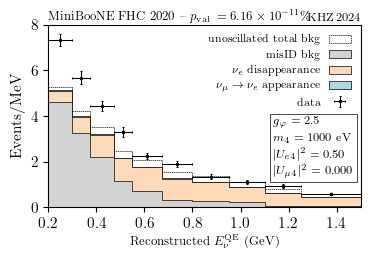

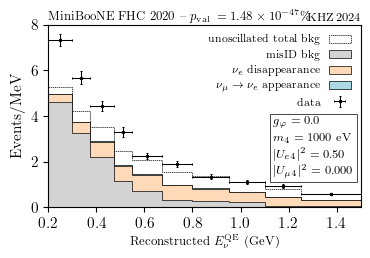

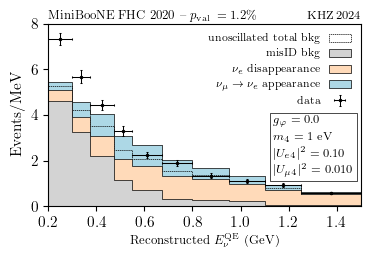

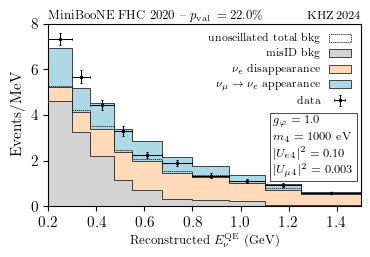

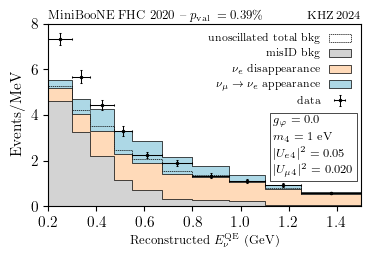

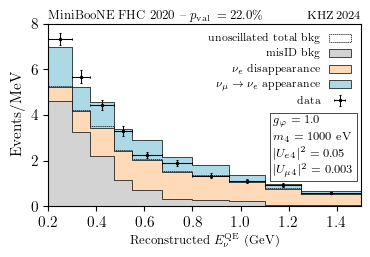

In [95]:
make_rate_plot(rates_dic_decay_hugeUe4, params_hugeUe4_dec, '3+1_dec_hugeUe4')
make_rate_plot(rates_dic_osc_hugeUe4, params_hugeUe4_osc, '3+1_osc_hugeUe4')

make_rate_plot(rates_dic_osc_BEST, params_BEST_osc, '3+1_osc_BEST')
make_rate_plot(rates_dic_decay_BEST, params_BEST_dec, '3+1_dec_BEST')

make_rate_plot(rates_dic_osc_solar, params_solar_osc, '3+1_osc_solar')
make_rate_plot(rates_dic_decay_solar, params_solar_dec, '3+1_dec_solar')

In [81]:
def make_numu_rate_plot(rates, params, name='3+1_osc'):
    fig, ax1 = pt.std_fig(figsize=(3.3*1.2,2*1.2))
    bins = param_scan.MB_Ereco_official_bins_numu
    bin_w = np.diff(bins)
    bin_c = bins[:-1] + bin_w/2

    ######################################
    # MiniBooNE 
    if TOTAL_RATE:
        units= 1
        ax1.set_ylabel(r"Events")
    else:
        units = 1/bin_w/1e3
        ax1.set_ylabel(r"Events/MeV")

    numu_data = np.genfromtxt(
        open_text(
            f"MiniTools.include.MB_data_release_2020.combined",
            f"miniboone_numudata.txt",
        )
    )
    numu_tot_bkg = np.genfromtxt(
                open_text(
                    f"MiniTools.include.MB_data_release_2020.combined",
                    f"miniboone_numu.txt",
                )
            )

    # plot data
    pt.data_plot(ax1, 
            X=bin_c,
            Y=numu_data*units, 
            xerr=bin_w/2, 
            yerr=np.sqrt(numu_data)*units,
            zorder=3)


    ax1.hist(bins[:-1],
            bins=bins,
            weights=(numu_tot_bkg)*units,
            edgecolor='black',
            lw=0.5,
            ls=(1,(2,1)),
            label=r'unoscillated total bkg',
            histtype='step',
            zorder=1.6)
    
    ax1.hist(bins[:-1],
            bins=bins,
            weights=rates['MC_numu_bkg_total_w_dis']*units,
            edgecolor='black',
            facecolor='thistle',
            lw=0.5,
            label=r'$\nu_\mu$ w/ disappearance',
            histtype='stepfilled',
            zorder=1.6)


    ax1.legend(fontsize=8, markerfirst=False, ncol=1)
    ax1.annotate(text=r'MiniBooNE FHC 2020', xy=(0.0,1.025), xycoords='axes fraction', fontsize=9)
    ax1.annotate(text=rf'\noindent $g_\varphi = {params["g"]:.1f}$\\$m_4 = {params["m4"]:.0f}$ eV\\$|U_{{e4}}|^2 = {params["Ue4Sq"]:.2f}$\\$|U_{{\mu 4}}|^2 = {params["Um4Sq"]:.3f}$', 
                 xy=(0.72,0.6), 
                 xycoords='axes fraction', 
                 fontsize=8.5,
                 bbox=dict(facecolor='none', edgecolor='black', linewidth=0.5, boxstyle='square,pad=0.3'))
    ax1.set_xlabel(r"Reconstructed $E_\nu^{\rm QE}$ (GeV)", fontsize=9, labelpad=2.5)
    ax1.set_xticks([0,0.5,1.0,1.5,1.9])
    ax1.set_xlim(0.0,1.9)
    ax1.set_ylim(0,500)

    ax1.annotate(text=PAPER_TAG, xy=(1,1.025), xycoords='axes fraction', fontsize=8.5, ha='right')

    # fig.savefig(f"{PATH_PLOTS}/Mini_{name}_numu.png", dpi=400)
    fig.savefig(f"{PATH_PLOTS}/Mini_{name}_numu.pdf", dpi=400)

/var/folders/dl/ccbsfs591r1fhgcws28m8xy40000gn/T/ipykernel_3604/1339146044.py:17: DeprecationWarning: open_text is deprecated. Use files() instead. Refer to https://importlib-resources.readthedocs.io/en/latest/using.html#migrating-from-legacy for migration advice.
  open_text(
/var/folders/dl/ccbsfs591r1fhgcws28m8xy40000gn/T/ipykernel_3604/1339146044.py:23: DeprecationWarning: open_text is deprecated. Use files() instead. Refer to https://importlib-resources.readthedocs.io/en/latest/using.html#migrating-from-legacy for migration advice.
  open_text(


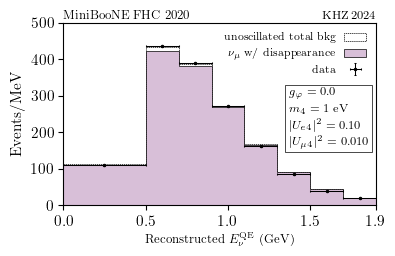

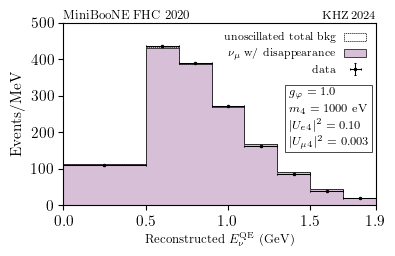

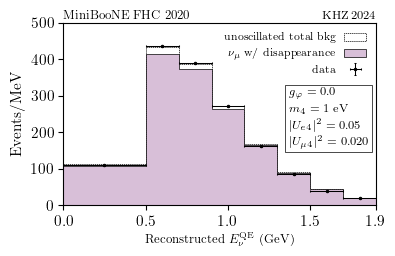

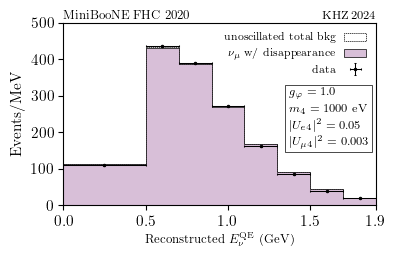

In [82]:
make_numu_rate_plot(rates_dic_osc_BEST, params_BEST_osc, '3+1_osc_BEST')
make_numu_rate_plot(rates_dic_decay_BEST, params_BEST_dec, '3+1_dec_BEST')

make_numu_rate_plot(rates_dic_osc_solar, params_solar_osc, '3+1_osc_solar')
make_numu_rate_plot(rates_dic_decay_solar, params_solar_dec, '3+1_dec_solar')

## MicroBooNE Rates

In [83]:
from MicroTools.InclusiveTools.inclusive_osc_tools import (
    Decay_muB_OscChi2,
    DecayMuBNuMuDis,
    DecayMuBNuEDis,
)

In [84]:

import copy
MuBchi2_null_hyp = 93

def make_micro_rate_plot(rates, params, name='micro_3+1_osc', PC=False):
    fig, ax1 = pt.std_fig(figsize=(3.3*1.2,2*1.2))

    bins = np.array([0.0 + 0.1 * j for j in range(26)] + [10.0])
    bin_w = np.diff(bins)
    bin_c = bins[:-1] + bin_w/2



    # MicroBooNE fully inclusive signal by unfolding MiniBooNE Signal
    uBFC = param_scan.GBFC.miniToMicro(rates["MC_nue_app_for_unfolding"])
    uBFC = np.insert(uBFC, 0, [0.0])
    uBFC = np.append(uBFC, 0.0)

    # MicroBooNE partially inclusive signal by unfolding MiniBooNE Signal
    MC_nue_app_for_unfolding2 = copy.deepcopy(rates["MC_nue_app_for_unfolding"])
    uBPC = param_scan.GBPC.miniToMicro(MC_nue_app_for_unfolding2)
    uBPC = np.insert(uBPC, 0, [0.0])
    uBPC = np.append(uBPC, 0.0)

    uBtemp = np.concatenate([uBFC, uBPC, np.zeros(85)])

    uB_signal = uBPC if PC else uBFC
#     unfolding = micro.unfolder.MBtomuB(
#     analysis="1eX_PC" if PC else "1eX",
#     remove_high_energy=False,
#     unfold=True,
#     effNoUnfold=True,
#     which_template="2020",
#     )

    # MicroBooNE fully inclusive signal by unfolding MiniBooNE Signal
#     uB_signal = unfolding.miniToMicro(rates["MC_nue_app_for_unfolding"])
#     uB_signal = np.insert(uB_signal, 0, [0.0])
#     uB_signal = np.append(uB_signal, 0.0)

    SAMPLE = "PC" if PC else "FC"
    other_bkg = np.load(micro.muB_inclusive_datarelease_path + f'nueCC_{SAMPLE}_Bkg.npy')
    intrinsic_bkg = np.load(micro.muB_inclusive_datarelease_path + f'nueCC_{SAMPLE}_Sig.npy')
    data = np.load(micro.muB_inclusive_datarelease_path + f'nueCC_{SAMPLE}_Obs.npy')

    # \nu_e disappearance signal replacement
    NuEReps = DecayMuBNuEDis(
    params,
    oscillations=True,
    decay=True,
    decouple_decay=False,
    disappearance=True,
    energy_degradation=True,
    )

    # \nu_mu disappearance signal replacement
    
    NuMuReps = DecayMuBNuMuDis(
    params,
    oscillations=True,
    decay=True,
    decouple_decay=False,
    disappearance=True,
    energy_degradation=True,
    )

    # MicroBooNE
    MuB_chi2 = Decay_muB_OscChi2(
        params,
        uBtemp,
        constrained=False,
        sigReps=[NuEReps[0], NuEReps[1], NuMuReps[0], NuMuReps[1], None, None, None],
        RemoveOverflow=True,
        oscillations=True,
        decay=True,
        decouple_decay=False,
        disappearance=True,
        energy_degradation=True,
    )

    ###################################### 
    if TOTAL_RATE:
        units= 1
        ax1.set_ylabel(r"Events")
    else:
        units = 1/bin_w/1e3
        ax1.set_ylabel(r"Events/MeV")

    # plot data
    pt.data_plot(ax1, 
            X=bin_c,
            Y=data*units, 
            xerr=bin_w/2, 
            yerr=np.sqrt(data)*units,
            zorder=3)


    ax1.hist(bins[:-1],
            bins=bins,
            weights=(other_bkg + intrinsic_bkg)*units,
            edgecolor='black',
            lw=0.5,
            ls=(1,(2,1)),
            label=r'unoscillated total bkg',
            histtype='step',
            zorder=1.8)
    ax1.hist(bins[:-1],
            bins=bins,
            weights=other_bkg*units,
            edgecolor='black',
            facecolor='lightgrey',
            lw=0.5,
            label=r'Non-$\nu_e$ bkg',
            histtype='stepfilled',
            zorder=1.7)
    ax1.hist(bins[:-1],
            bins=bins,
            weights=(other_bkg+NuEReps[1 if PC else 0])*units,
            edgecolor='black',
            facecolor='peachpuff',
            lw=0.5,
            label=r'$\nu_e$ disappearance',
            histtype='stepfilled',
            zorder=1.6)
    ax1.hist(bins[:-1],
            bins=bins,
            weights=(uB_signal+NuEReps[1 if PC else 0])*units,
            edgecolor='black',
            facecolor='lightblue',
            lw=0.5,
            label=r'$\nu_e$ appearance',
            histtype='stepfilled',
            zorder=1.4)

    ax1.legend(loc='upper right', fontsize=8, markerfirst=False, ncol=1)
    ax1.annotate(text=fr'MicroBooNE {"PC" if PC else "FC"} 2020 $\vert$ $\Delta \chi^2 = {MuB_chi2 - MuBchi2_null_hyp:.0f}$', xy=(0.0,1.025), xycoords='axes fraction', fontsize=9)
    ax1.annotate(text=rf'\noindent $g_\varphi = {params["g"]:.1f},\, m_4 = {params["m4"]:.0f}$ eV\\$|U_{{e4}}|^2 = {params["Ue4Sq"]:.2f}\\|U_{{\mu 4}}|^2 = {params["Um4Sq"]:.3f}$', 
                 xy=(0.025,0.91), 
                 xycoords='axes fraction', 
                 fontsize=8.5,
                 bbox=dict(facecolor='none', edgecolor='black', linewidth=0.5, boxstyle='square,pad=0.3'))

    ax1.set_xlabel(r"Reconstructed $E_\nu^{\rm QE}$ (GeV)", fontsize=9, labelpad=2.5)
    ax1.set_xticks([0,0.5,1.0,1.5,2.0, 2.5])
    ax1.set_xlim(0.0,2.5)
    ax1.set_ylim(0,0.3 if PC else 0.5)

    ax1.annotate(text=PAPER_TAG, xy=(1,1.025), xycoords='axes fraction', fontsize=8.5, ha='right')

#     fig.savefig(f"{PATH_PLOTS}/Micro_{name}_{'PC' if PC else 'FC'}.png", dpi=400)
    fig.savefig(f"{PATH_PLOTS}/Micro_{name}_{'PC' if PC else 'FC'}.pdf", dpi=400)

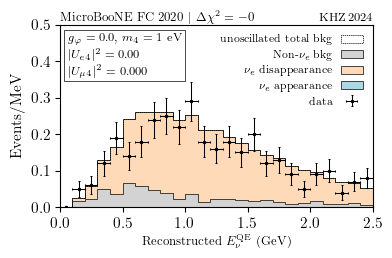

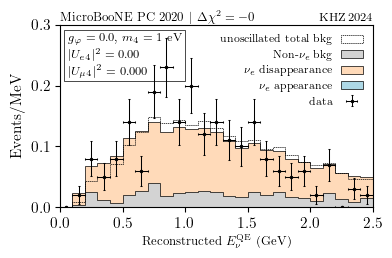

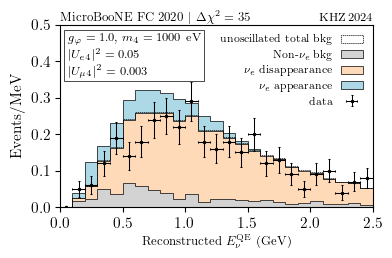

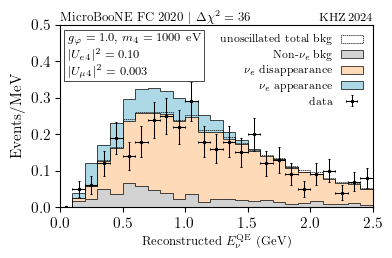

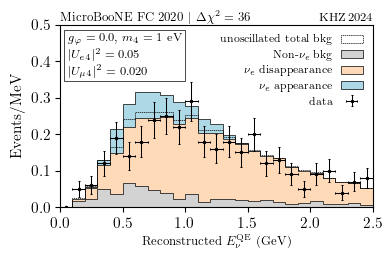

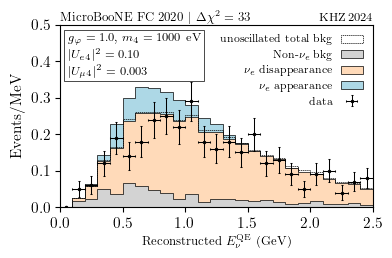

In [66]:
make_micro_rate_plot(rates_no_osc, params_no_osc, 'No osc')
make_micro_rate_plot(rates_no_osc, params_no_osc, 'No osc', PC=True)

make_micro_rate_plot(rates_dic_decay_solar, params_solar_dec, '3+1_dec_BEST')
# make_micro_rate_plot(rates_dic_decay_solar, params_solar_dec, '3+1_dec_BEST', PC=True)

make_micro_rate_plot(rates_dic_decay_BEST, params_BEST_dec, '3+1_dec_BEST')
# make_micro_rate_plot(rates_dic_decay_BEST, params_BEST_dec, '3+1_dec_BEST', PC=True)

make_micro_rate_plot(rates_dic_osc_solar, params_solar_osc, '3+1_osc_solar')
# make_micro_rate_plot(rates_dic_osc_solar, params_solar_osc, '3+1_osc_solar', PC=True)

make_micro_rate_plot(rates_dic_osc_BEST, params_BEST_dec, '3+1_osc_BEST')
# make_micro_rate_plot(rates_dic_osc_BEST, params_BEST_dec, '3+1_osc_BEST', PC=True)